In [50]:
import numpy as np
import os
from skimage import io
from skimage.transform import resize as imresize
import ScanImageTiffReader
from sklearn import decomposition

%matplotlib notebook
from matplotlib import pyplot as plt, gridspec

In [5]:
dirpath = r"C:\data\2019_08 CSHL 2019\GroupDelta"
tifpaths = [os.path.join(dirpath, f) for f in os.listdir(dirpath) if f.endswith(".tif")]
# tifpaths

['C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6f_00003.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\H2B-GCaMP6s_00003.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00001.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00002.tif',
 'C:\\data\\2019_08 CSHL 2019\\GroupDelta\\HuC-GCaMP5G_00003.tif']

In [52]:
tifpath = tifpaths[0]
print(tifpath)
reader = ScanImageTiffReader.ScanImageTiffReader(tifpath)
data = reader.data()
metadata = reader.metadata()
reader.close()

C:\data\2019_08 CSHL 2019\GroupDelta\H2B-GCaMP6f_00001.tif


In [20]:
reader.description(0)

'frameNumbers = 1\nacquisitionNumbers = 1\nframeNumberAcquisition = 1\nframeTimestamps_sec = 0.000000000\nacqTriggerTimestamps_sec = -0.000014400\nnextFileMarkerTimestamps_sec = -1.000000000\nendOfAcquisition = 0\nendOfAcquisitionMode = 0\ndcOverVoltage = 0\nepoch = [2019  8  2 14 58 12.934]\nauxTrigger0 = []\nauxTrigger1 = []\nauxTrigger2 = []\nauxTrigger3 = []\nI2CData = {}\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [51]:
def coerce_string(string):
    if string == 'true':
        return True
    elif string == 'false':
        return False
    else:
        try:
            return int(string)
        except ValueError:
            try:
                return float(string)
            except ValueError: 
                return string

    
metadict = {line.split('=')[0].strip():coerce_string(line.split('=')[1].strip()) for line in metadata.split("\n") if line.startswith('SI')}
metadict

{'SI.LINE_FORMAT_VERSION': 1,
 'SI.TIFF_FORMAT_VERSION': 3,
 'SI.VERSION_COMMIT': "'4a9264c4fccd21a03258704d0d6489537ad79e6c'",
 'SI.VERSION_MAJOR': "'2018b'",
 'SI.VERSION_MINOR': "'1'",
 'SI.acqState': "'grab'",
 'SI.acqsPerLoop': 1,
 'SI.extTrigEnable': False,
 'SI.hBeams.beamCalibratedStatus': '[false false]',
 'SI.hBeams.directMode': '[false false]',
 'SI.hBeams.enablePowerBox': False,
 'SI.hBeams.flybackBlanking': True,
 'SI.hBeams.interlaceDecimation': '[1 1]',
 'SI.hBeams.interlaceOffset': '[0 0]',
 'SI.hBeams.lengthConstants': '[Inf Inf]',
 'SI.hBeams.powerBoxEndFrame': inf,
 'SI.hBeams.powerBoxStartFrame': 1,
 'SI.hBeams.powerBoxes.rect': '[0.25 0.25 0.5 0.5]',
 'SI.hBeams.powerBoxes.powers': '[NaN NaN]',
 'SI.hBeams.powerBoxes.name': "''",
 'SI.hBeams.powerBoxes.oddLines': True,
 'SI.hBeams.powerBoxes.evenLines': True,
 'SI.hBeams.powerLimits': '[100 100]',
 'SI.hBeams.powers': '[27.1 0.1]',
 'SI.hBeams.pzAdjust': '[false false]',
 'SI.hBeams.pzCustom': '{[] []}',
 'SI.hBeam

In [42]:
fps = metadict['SI.hRoiManager.scanFrameRate']

In [39]:
data.shape

(3300, 512, 512)

<IPython.core.display.Javascript object>


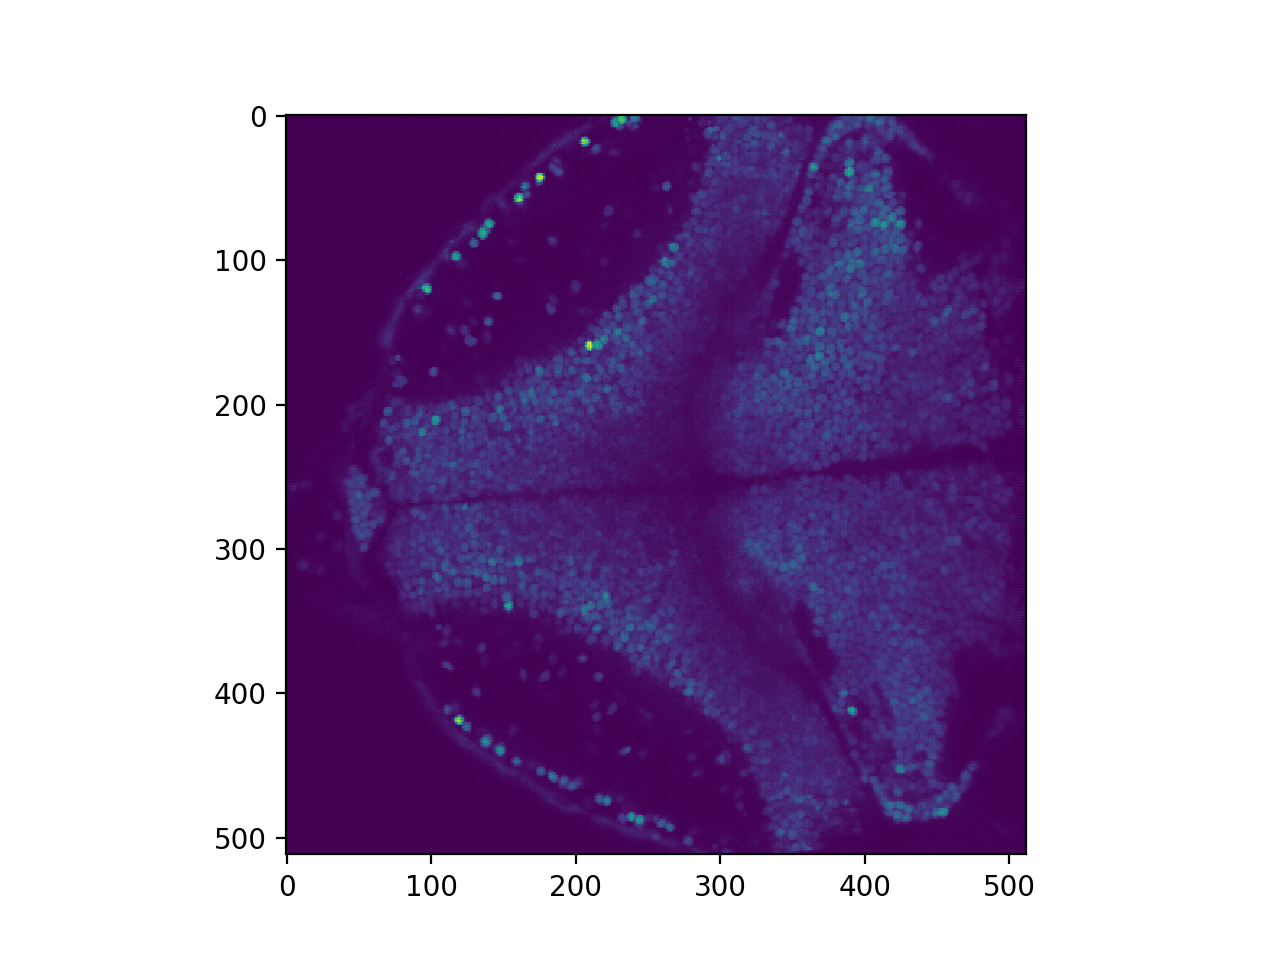

In [41]:
plt.figure()
plt.imshow(data.mean(axis=0))

<IPython.core.display.Javascript object>


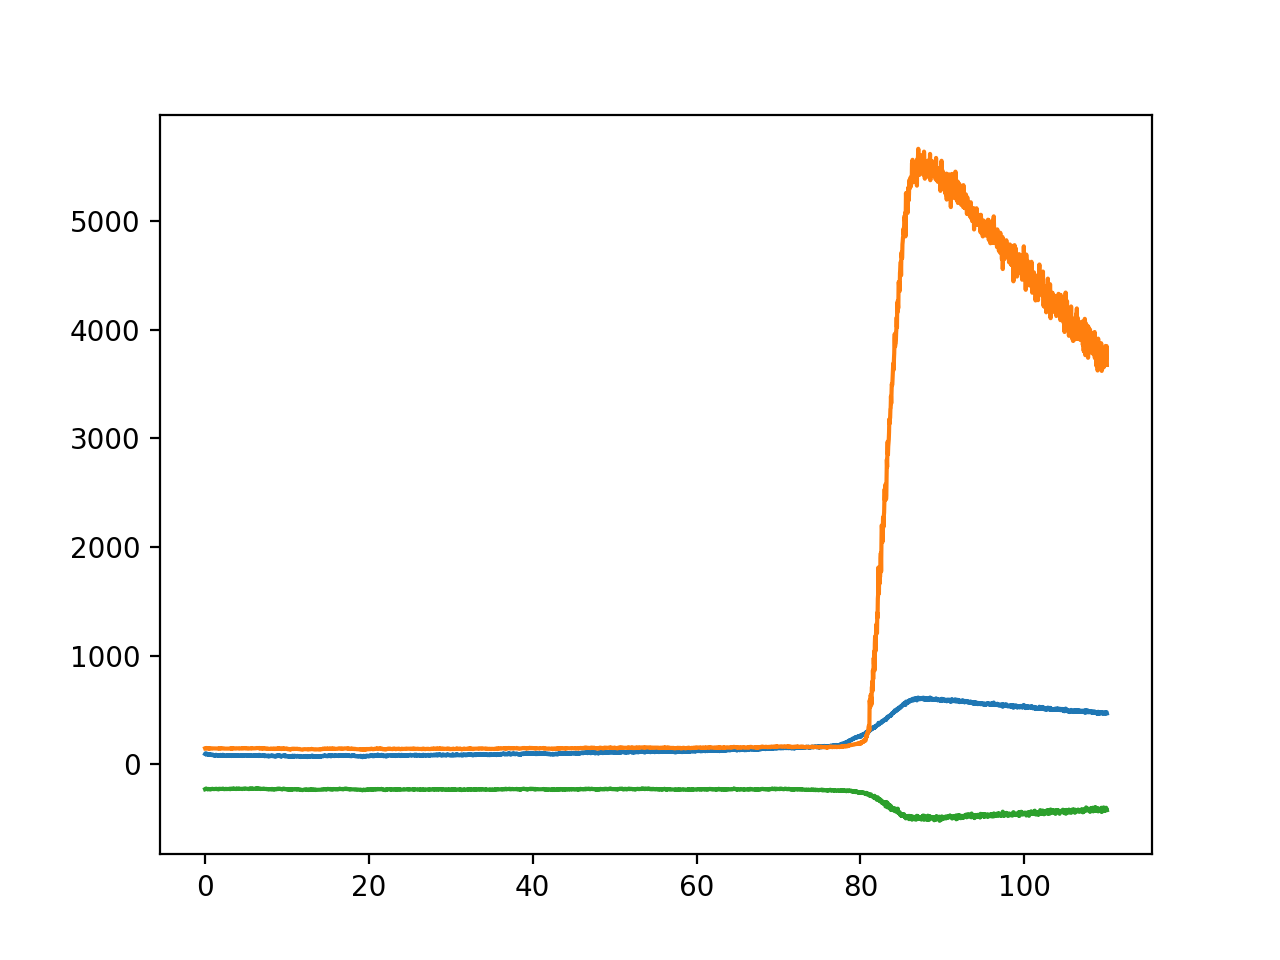

In [49]:
plt.figure()
plt.plot(np.arange(data.shape[0])/fps, data.mean(axis=(1,2)), label = 'mean')
plt.plot(np.arange(data.shape[0])/fps, np.percentile(data, 95, axis=(1,2)), label='95%')
plt.plot(np.arange(data.shape[0])/fps, np.percentile(data, 1, axis=(1,2)), label='1%')


In [ ]:
plt.figure()


# time vs percentile as imshow